In [41]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    
    if s < 0.0000001:
        s = 0.0000001
    elif 1 - s < 0.0000001:
        s = 1 - 0.0000001
    
    return s

def hx(x, y, theta):
    sum = 0
    idx = 0
    for i in range(0, 10):
        for j in range(0, 10):
            sum = sum + (x**i)*(y**j)*theta[idx]
            idx = idx + 1
    return sum

def gradientDescent(theta, z, label, data, a, lamb):
    for i in range(len(label)):
        for j in range(len(data)):
            theta[j] = (1 - a * lamb) * theta[j] - a * (sigmoid(z[i]) - label[i]) * d[j][i]
    return theta

def gFunction(theta, data):
    z = 0
    for i in range(len(data)):
        z = z + theta[i] * data[i]

    return z


def jFunction(label, z, r):
    sum = 0
    for i in range(len(label)):
        s = sigmoid(z[i])
        sum = sum + (-1)*(label[i])*(np.log(s)) + (-1)*(1 - label[i])*(np.log(1-s))

    return sum + r
    
def regular(lamb, theta):
    sum = 0
    for i in theta:
        sum = sum + i
    return (sum * lamb)/2

def accuracy(z, label):
    count = 0
    for i in range(len(z)):
        if(sigmoid(z[i]) > 1/2 and label[i] == 1) or (sigmoid(z[i]) <= 1/2 and label[i] == 0):
            count = count + 1
    
    return count

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX = data[:, 0]
pointY = data[:, 1]
label = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]
pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

x = np.array(pointX)
y = np.array(pointY)
label = np.array(data[:, 2])


m = len(x)
ones = []
for i in range(m):
    ones.append(1)
ones = np.array(ones)

a = 0.001
of_lambda = 0.0001
jr_lambda = 0.01
uf_lambda = 0.1

#print(m)

of_theta = []
jr_theta = []
uf_theta = []

for i in range(100):
    of_theta.append(1)
    jr_theta.append(2)
    uf_theta.append(3)


of_cost = []
jr_cost = []
uf_cost = []

of_acc = []
jr_acc = []
uf_acc = []

temp = []
for i in range(0, 10):
    for j in range(0, 10):
        temp.append((x**i) * (y**j))
d = np.array(temp)


    
for i in range(3000):
    
    #overfit
    of_r = regular(of_lambda, of_theta)
    of_z = gFunction(of_theta, d)
    of_j = jFunction(label, of_z, of_r)
    of_cost.append(of_j)
    temp_of_acc = accuracy(of_z, label) / len(label) * 100
    of_acc.append(temp_of_acc)
    of_theta = gradientDescent(of_theta, of_z, label, d, a, of_lambda)
    
    
    #just right
    jr_r = regular(jr_lambda, jr_theta)
    jr_z = gFunction(jr_theta, d)
    jr_j = jFunction(label, jr_z, jr_r)
    jr_cost.append(jr_j)
    temp_jr_acc = accuracy(jr_z, label) / len(label) * 100
    jr_acc.append(temp_jr_acc)
    jr_theta = gradientDescent(jr_theta, jr_z, label, d, a, jr_lambda)
    
    #underfit
    uf_r = regular(uf_lambda, uf_theta)
    uf_z = gFunction(uf_theta, d)
    uf_j = jFunction(label, uf_z, uf_r)
    uf_cost.append(uf_j)
    temp_uf_acc = accuracy(uf_z, label) / len(label) * 100
    uf_acc.append(temp_uf_acc)
    uf_theta = gradientDescent(uf_theta, uf_z, label, d, a, uf_lambda)

In [43]:
_x = np.linspace(-1, 1, 1000)
_y = np.linspace(-1, 1, 1000)
xmesh, ymesh = np.meshgrid(_x, _y)
    
of_h = hx(xmesh, ymesh, of_theta)
jr_h = hx(xmesh, ymesh, jr_theta)
uf_h = hx(xmesh, ymesh, uf_theta)

In [52]:
def sig(x):
    return (1 / (1 + np.exp(-x)))

1. Plot the training data

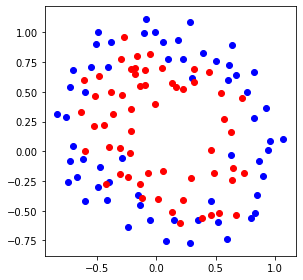

In [44]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

2. Plot the training error with varying regularization parameters

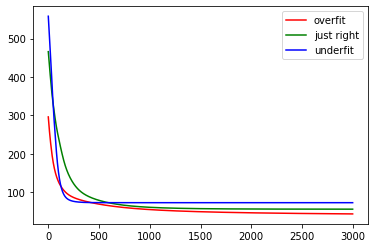

In [45]:
plt.plot(of_cost, color = 'r')
plt.plot(jr_cost, color = 'g')
plt.plot(uf_cost, color = 'b')
plt.legend(['overfit', 'just right', 'underfit'])
plt.show()

In [ ]:
3.

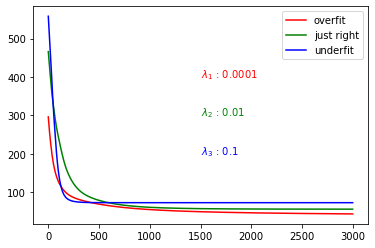

In [55]:
plt.plot(of_cost, color = 'r')
plt.plot(jr_cost, color = 'g')
plt.plot(uf_cost, color = 'b')
plt.legend(['overfit', 'just right', 'underfit'])
plt.text(1500, 400, r'$\lambda_1$ : ' + str(of_lambda), c = 'r')
plt.text(1500, 300, r'$\lambda_2$ : ' + str(jr_lambda), c = 'g')
plt.text(1500, 200, r'$\lambda_3$ : ' + str(uf_lambda), c = 'b')

plt.show()

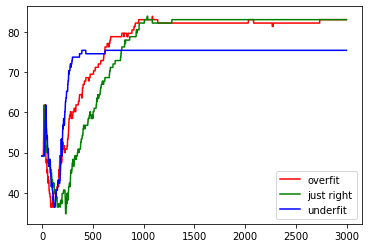

In [47]:
plt.plot(of_acc, color = 'red')
plt.plot(jr_acc, color = 'green')
plt.plot(uf_acc, color = 'blue')
plt.legend(['overfit', 'just right', 'underfit'])
plt.show()

In [48]:
print("\033[31m{0}% - overfit \033[00m".format(of_acc[len(of_acc)-1]))
print("\033[31m{0}% - overfit \033[00m".format(jr_acc[len(jr_acc)-1]))
print("\033[31m{0}% - overfit \033[00m".format(uf_acc[len(uf_acc)-1]))

83.05084745762711% - overfit 
83.05084745762711% - overfit 
75.42372881355932% - overfit 


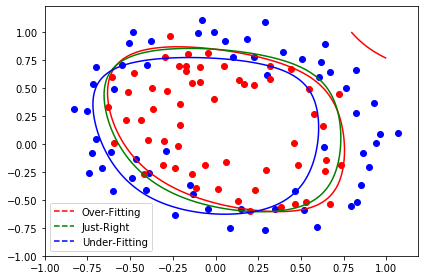

In [54]:
plt.figure()
plt.scatter(pointX0, pointY0, c = 'b')
plt.scatter(pointX1, pointY1, c = 'r')
plt.tight_layout()
l1 = plt.contour(xmesh, ymesh, of_h, levels = 0, colors = 'r')
l2 = plt.contour(xmesh, ymesh, jr_h, levels = 0, colors = 'g')
l3 = plt.contour(xmesh, ymesh, uf_h, levels = 0, colors = 'b')
l1,_ = l1.legend_elements()
l2,_ = l2.legend_elements()
l3,_ = l3.legend_elements()

plt.legend(handles=[l1[0], l2[0], l3[0]], labels=['Over-Fitting', 'Just-Right', 'Under-Fitting'])
plt.show()